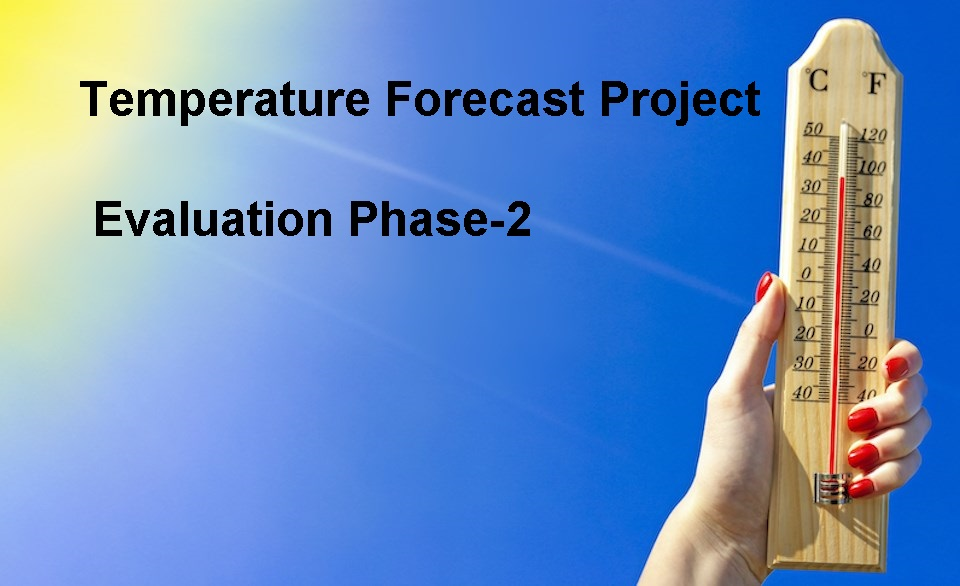

### Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

###    Attribute Information:

###### For more information, read [Cho et al, 2020].


You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset


###### Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

# Importing Necessary Libraries 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

# Uploading the data set

In [2]:
temp=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

# Lets check the first five row of our data set.

In [3]:
temp.head(5)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

# Lets check the last five rows of our data set.

In [4]:
temp.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

# Lets check shape of our data set

In [5]:
temp.shape

(7752, 25)

We have 7752 rows and 25 columns in our temp data set.

## Checking the info about temp data set.

In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Temp data set has 24 float columns and one object column.

## Lets check unique and value counts in our temperature data set.

In [7]:
temp['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [8]:
temp['LDAPS_CC3'].nunique()

7599

In [9]:
temp['LDAPS_CC3'].value_counts()

0.000000e+00    76
8.680560e-04     2
5.810000e-07     2
9.837888e-01     2
6.649821e-02     1
                ..
4.133839e-02     1
2.662563e-02     1
3.524063e-02     1
1.526382e-02     1
5.850000e-07     1
Name: LDAPS_CC3, Length: 7599, dtype: int64

In [10]:
temp['LDAPS_CC3'].unique()

array([1.61696854e-01, 1.59444059e-01, 2.04091465e-01, ...,
       2.37000000e-05, 7.86000000e-05, 5.85000000e-07])

In [11]:
temp['LDAPS_CC3'].nunique()

7599

In [12]:
temp['Date'].unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '10-08-2013', '11-08-2013', '12-08-2013',
       '13-08-2013', '14-08-2013', '15-08-2013', '16-08-2013',
       '17-08-2013', '18-08-2013', '19-08-2013', '20-08-2013',
       '21-08-2013', '22-08-2013', '23-08-2013', '24-08-2013',
       '25-08-2013', '26-08-2013', '27-08-2013', '28-08-2013',
       '29-08-2013', '30-08-2013', '30-06-2014', '01-07

In [13]:
temp['Date'].nunique()

310

In [14]:
temp['Date'].value_counts()

30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64

In [15]:
temp['station'].unique

<bound method Series.unique of 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
7747    23.0
7748    24.0
7749    25.0
7750     NaN
7751     NaN
Name: station, Length: 7752, dtype: float64>

In [16]:
temp['station'].nunique

<bound method IndexOpsMixin.nunique of 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
        ... 
7747    23.0
7748    24.0
7749    25.0
7750     NaN
7751     NaN
Name: station, Length: 7752, dtype: float64>

In [17]:
temp.columns


Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Creating a table with data missing

In [18]:
temp.isnull().sum().sort_values(ascending=0)

LDAPS_CC3           75
LDAPS_PPT4          75
LDAPS_PPT2          75
LDAPS_PPT1          75
LDAPS_CC4           75
LDAPS_CC2           75
LDAPS_CC1           75
LDAPS_LH            75
LDAPS_WS            75
LDAPS_Tmin_lapse    75
LDAPS_Tmax_lapse    75
LDAPS_RHmax         75
LDAPS_RHmin         75
LDAPS_PPT3          75
Present_Tmin        70
Present_Tmax        70
Next_Tmax           27
Next_Tmin           27
Date                 2
station              2
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
dtype: int64

## Creating a table with data missing

In [19]:
missing_values=temp.isnull().sum() # missing values

percent_missing = temp.isnull().sum()/temp.shape[0]*100 # missing value %

value = {
    'Missing_values ':missing_values,
    'Percent_missing %':percent_missing , 
     'Data type' : temp.dtypes
}
frame=pd.DataFrame(value)
frame

Missing_values   Percent_missing % Data type
station                         2           0.025800   float64
Date                            2           0.025800    object
Present_Tmax                   70           0.902993   float64
Present_Tmin                   70           0.902993   float64
LDAPS_RHmin                    75           0.967492   float64
LDAPS_RHmax                    75           0.967492   float64
LDAPS_Tmax_lapse               75           0.967492   float64
LDAPS_Tmin_lapse               75           0.967492   float64
LDAPS_WS                       75           0.967492   float64
LDAPS_LH                       75           0.967492   float64
LDAPS_CC1                      75           0.967492   float64
LDAPS_CC2                      75           0.967492   float64
LDAPS_CC3                      75           0.967492   float64
LDAPS_CC4                      75           0.967492   float64
LDAPS_PPT1                     75           0.967492   float64
LDAPS_PPT2                     75           0.967492   float64
LDAPS_PPT3                     75           0.967492   float64
LDAPS_PPT4                     75           0.967492   float64
lat                             0           0.000000   float64
lon                             0           0.000000   float64
DEM                             0           0.000000   float64
Slope                           0           0.000000   float64
Solar radiation                 0           0.000000   float64
Next_Tmax                      27           0.348297   float64
Next_Tmin                      27           0.348297   float64

# Handling Missing Data

We are missing 2 values in station and 2 values in data.
As we know we have 25 stations and Nan is present at 7750 and 7751 index, Here we can see data is collected in ordered way from all stations, so after 25th, count will start from 1st agin. so for 7750 index it will agin the 1st station for 7751 it will be the 2nd station.

In [20]:
temp['station'].iloc[7750]=1.0
temp['station'].iloc[7751]=2.0

In [21]:
temp['Date'].iloc[7750]='31-08-2017'
temp['Date'].iloc[7751]='31-08-2017'

In [22]:
for col in temp.columns:
    if col not in ['station', 'Date']:
        temp[col] = temp[col].replace(np.nan, temp[col].median())

### Checking the missing values once again in our temp data set.

In [23]:
temp.isnull().sum().sort_values(ascending=0)

station             0
LDAPS_CC4           0
Next_Tmax           0
Solar radiation     0
Slope               0
DEM                 0
lon                 0
lat                 0
LDAPS_PPT4          0
LDAPS_PPT3          0
LDAPS_PPT2          0
LDAPS_PPT1          0
LDAPS_CC3           0
Date                0
LDAPS_CC2           0
LDAPS_CC1           0
LDAPS_LH            0
LDAPS_WS            0
LDAPS_Tmin_lapse    0
LDAPS_Tmax_lapse    0
LDAPS_RHmax         0
LDAPS_RHmin         0
Present_Tmin        0
Present_Tmax        0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

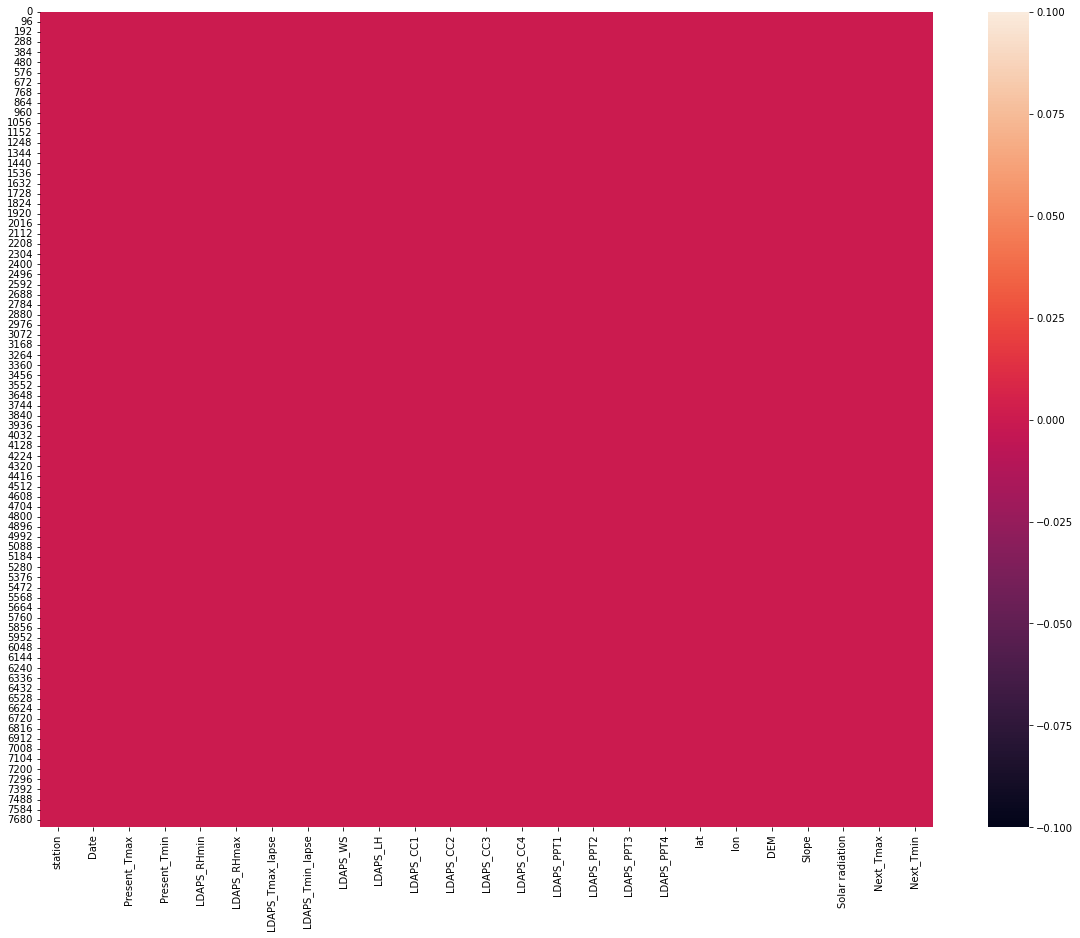

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(temp.isnull())


Now we have no missing values in our data set.

# Descriptive Statistics

In [26]:
temp.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     12.997033     29.769401     23.226638    56.742728    88.388529   
std       7.213007      2.956583      2.403093    14.597945     7.158471   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.614317         23.514984     7.092549    62.450457   
std            2.932911          2.334099     2.173913    33.571540   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368260  ...     0.480310     0.275508     0.266801    37.544722   
std       0.261236  ...     1.754900     1.156495     1.200654     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148321  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.016748     0.007231     0.000000    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.275671   
std       0.079435    54.279780     1.370444       429.158867     3.122585   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.932804  
std       2.483296  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [27]:
temp['Date']=pd.to_datetime(temp['Date'])

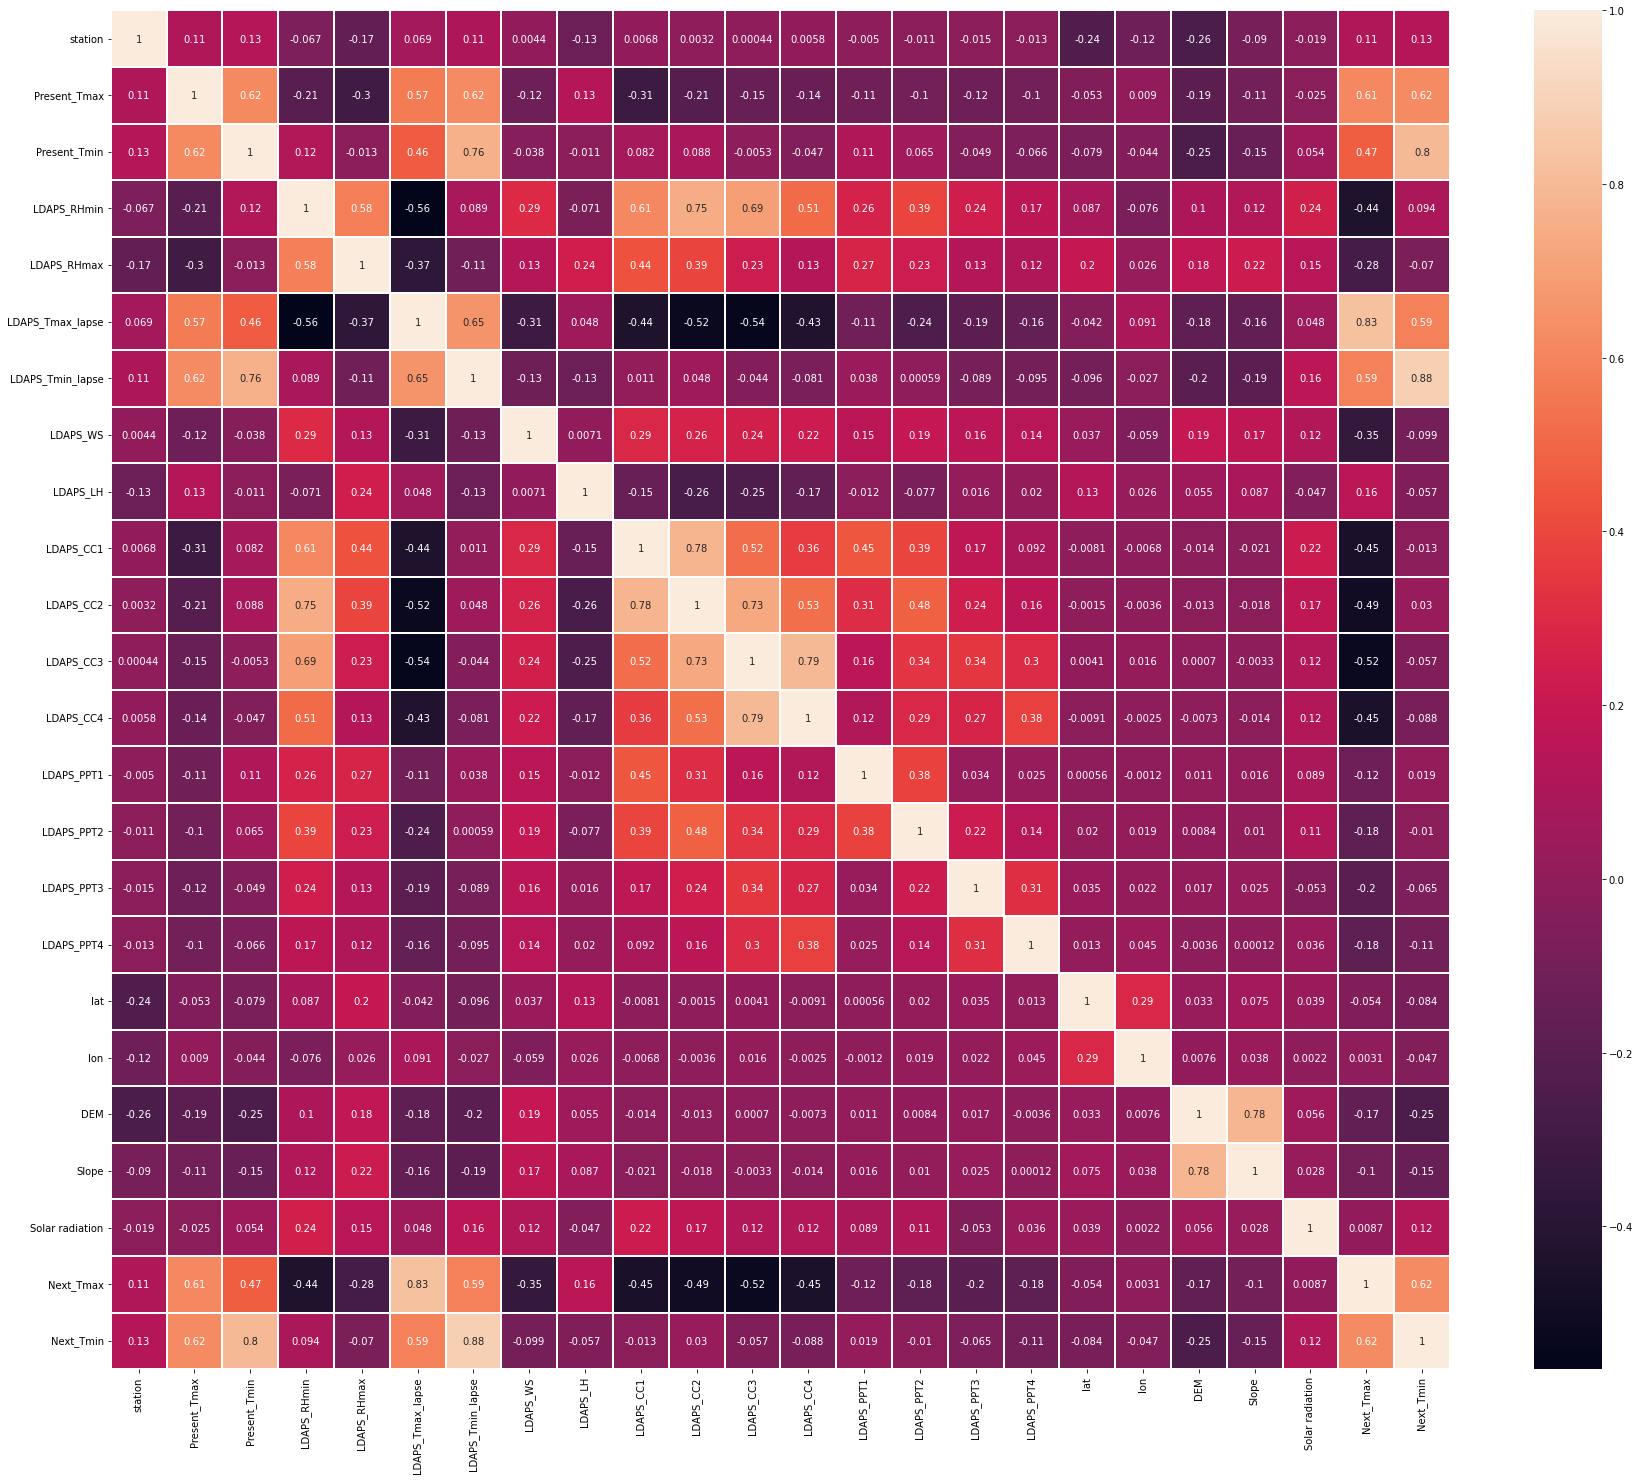

In [28]:
plt.figure(figsize=(30,25))
sns.heatmap(temp.corr(),linewidths=0.1,annot=True)
plt.show()        

### Checking the skewness in our temperature data set.

In [29]:
temp.skew()

station             0.000182
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

# Data Visualization

## Univariate Analysis

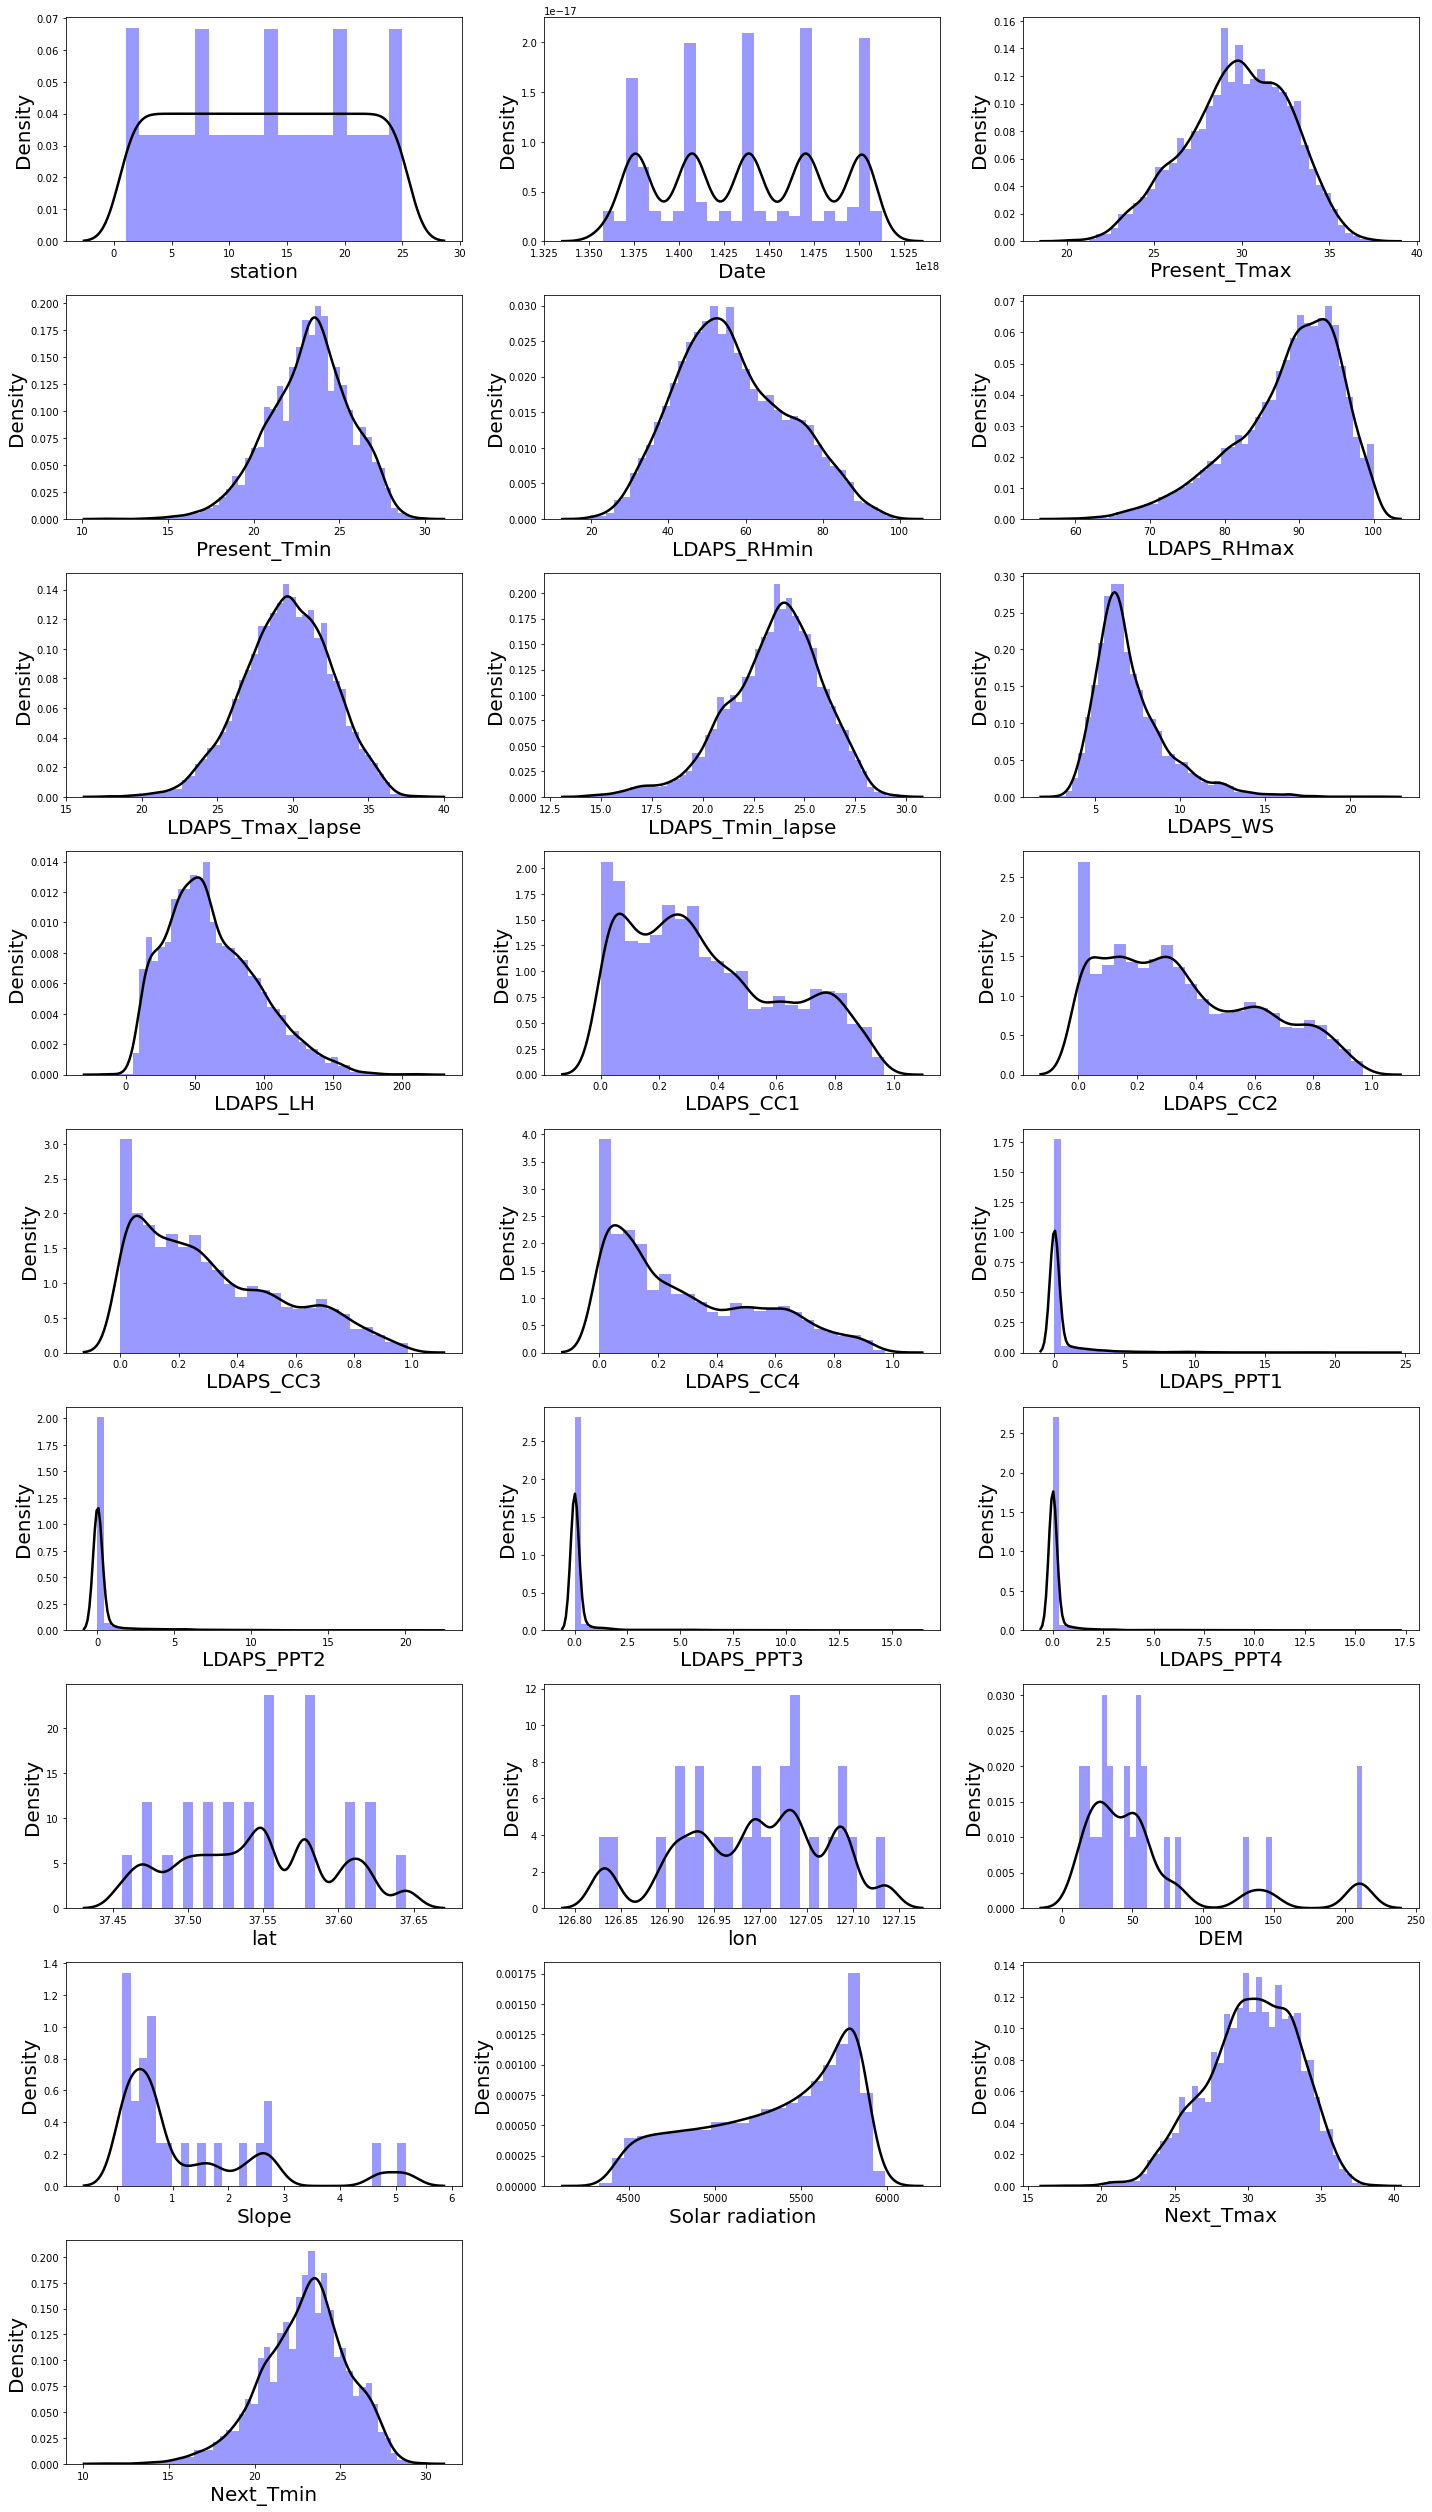

In [50]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber= 1

for column in temp.columns:
    if plotnumber<=26:
        ax= plt.subplot(9,3, plotnumber)
        sns.distplot(temp[column], color='blue',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

In [51]:
temp['Slope'].value_counts()

2.785000    310
0.514100    310
0.271300    310
0.222300    310
0.155400    310
0.133200    310
0.572100    310
4.729600    310
1.767800    310
1.231300    310
0.697000    310
2.257900    310
0.855200    310
0.618000    310
2.686500    310
0.593100    310
0.623300    310
5.178200    310
0.412500    310
1.562900    310
0.098500    310
0.145700    310
0.505500    310
2.534800    310
0.266100    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

Text(0, 0.5, 'Counts')

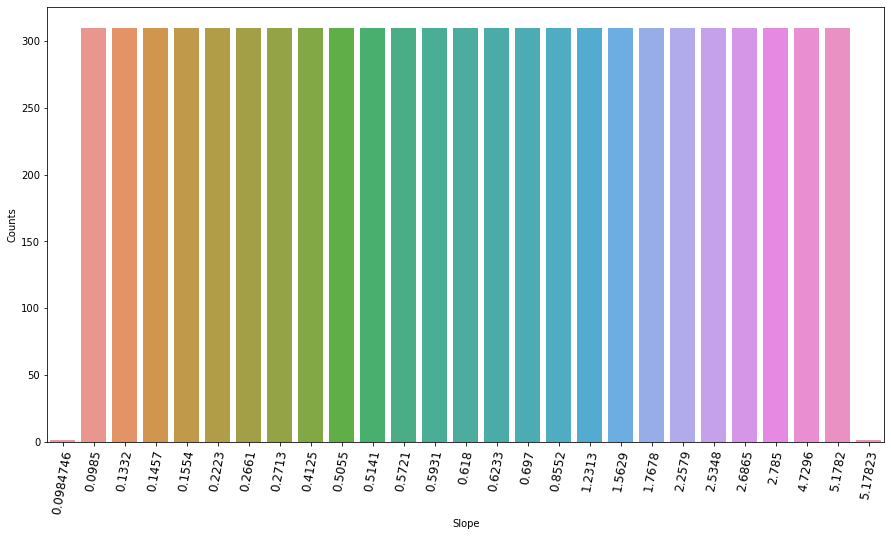

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=temp)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

All the slope values have equal no. of counts except for 2 slopes which have only one count each.

Text(0, 0.5, 'Counts')

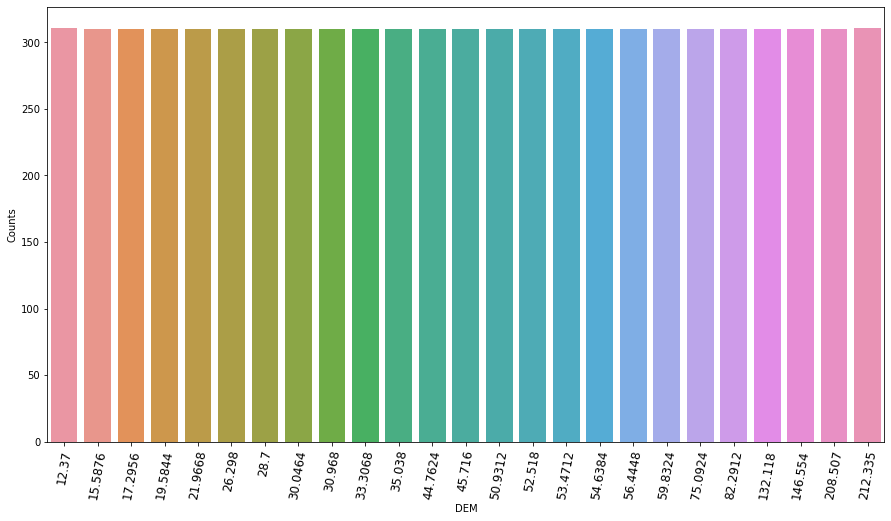

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=temp)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

All the elevations have same count equal to 310 except two who have 311 counts each

## Bivariate Analysis

Here we will analyse our data against our target column.

Lets analyse the graphs between date and in our target columns. we will use line plot for numerical to numerical data visualization.

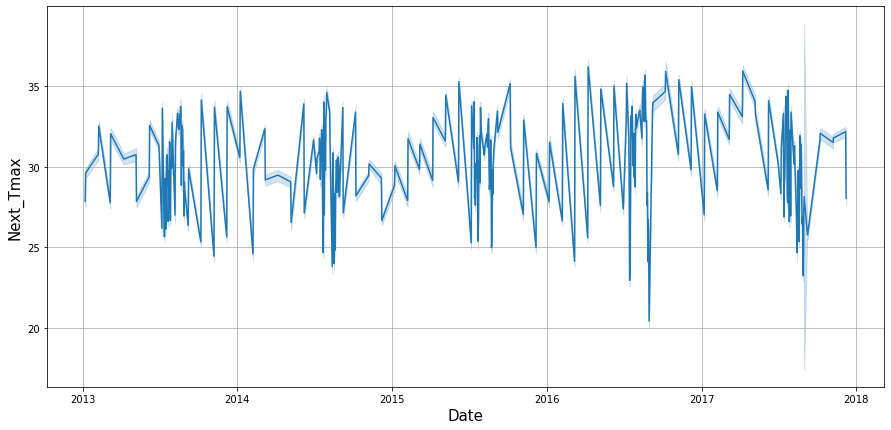

In [54]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Next_Tmax', data= temp )
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

From the Graphs we can see the Next_Tmax is maximum between te 2017 to 2018 and it is min between 2016 to 2017.

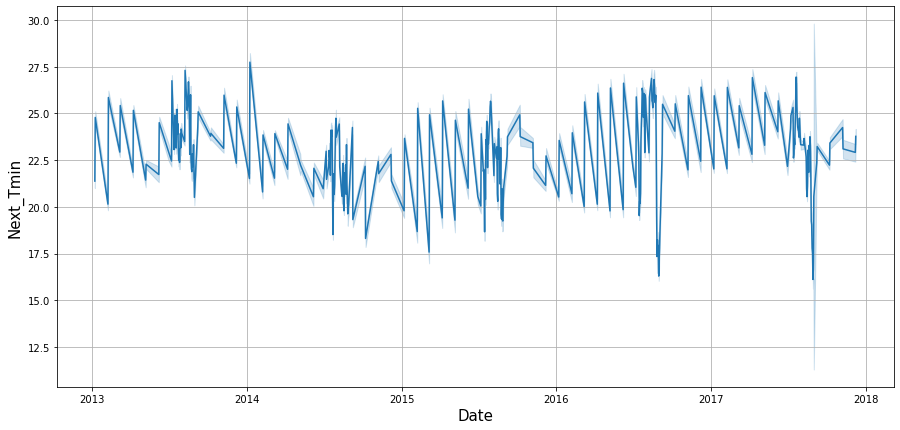

In [55]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Next_Tmin', data= temp )
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

From the Graphs we can see the Next_Tmin is maximum is in the starting of 2014 and it is minimum between 2017 to 2018.

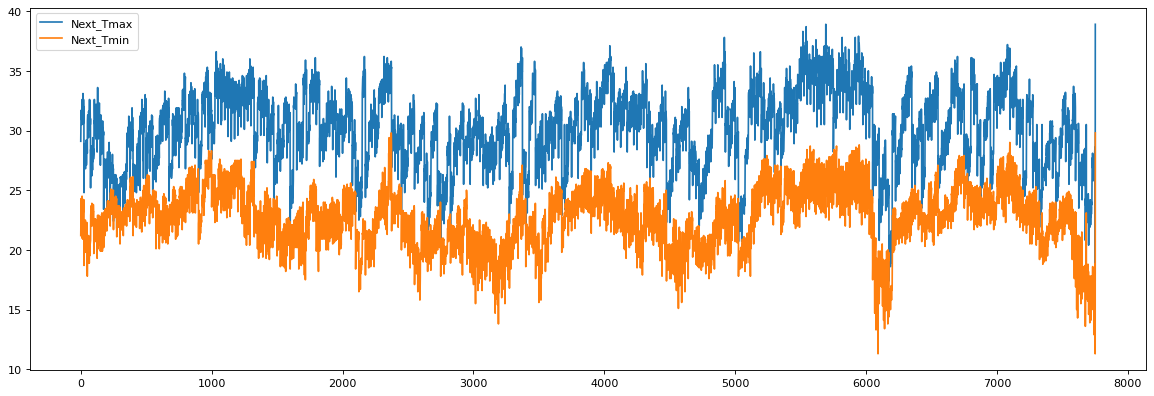

In [56]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(temp["Next_Tmax"],label="Next_Tmax")
plt.plot(temp["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

Here we can see Next_tmin and Next_tmax both showing almost equal kind of pattern. where there is growth in the Tmax, same kind of growth we can see in Tmin.

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

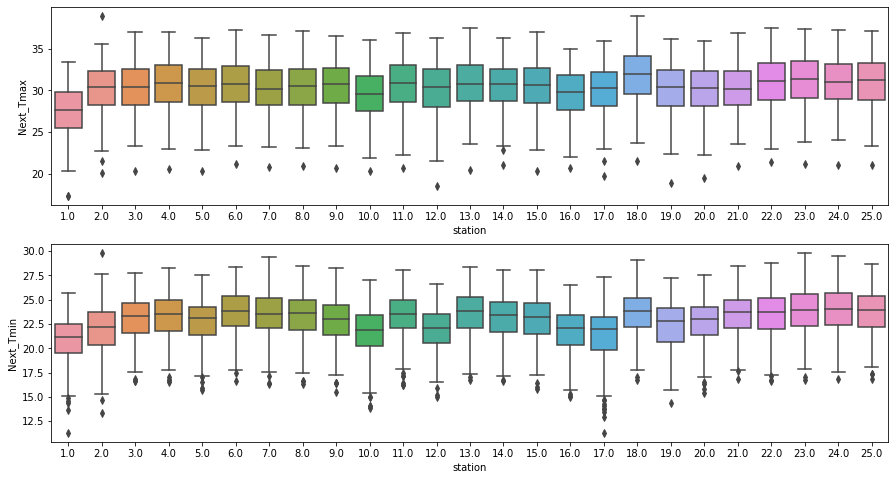

In [58]:
#Ploting wrt to station
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=temp)

plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=temp)

Graph showing the temprature at every 25 stations. we can clearly see Tmax and Tmin is maximum at station 18 and it is minimun at station 1

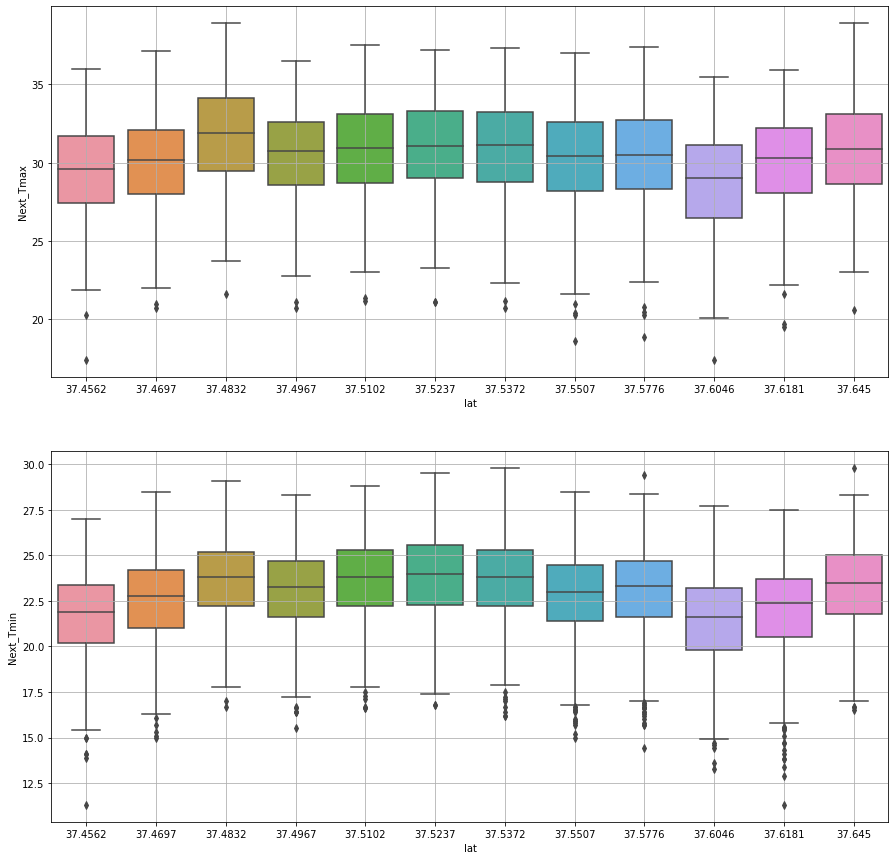

In [59]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=temp)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=temp)
plt.grid(True)

Here we can see the relationship between latitude and Next temprature.
we can see Next_Tmax increases with increase in the latitude while this is not the True for Next_Tmin

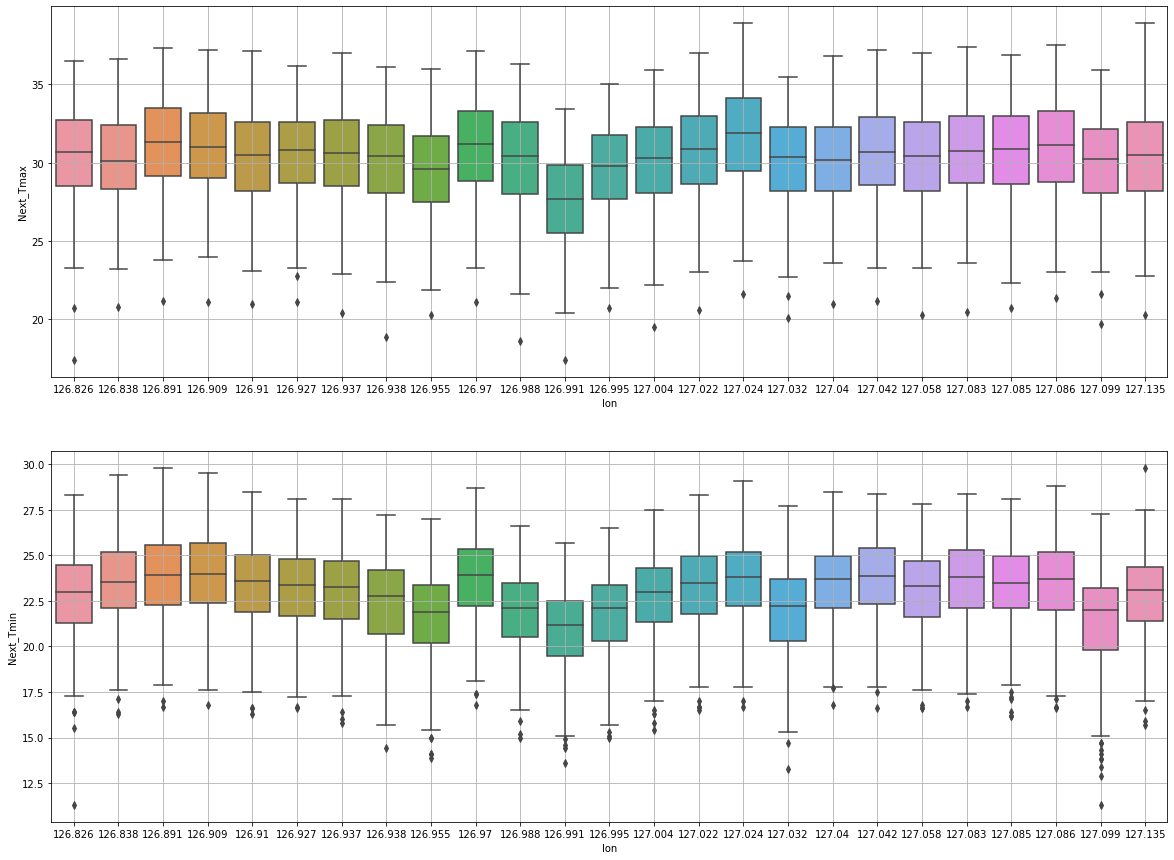

In [60]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=temp)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=temp)
plt.grid(True)

Here we can see there is no direct relationship between the temprature and Longitude.

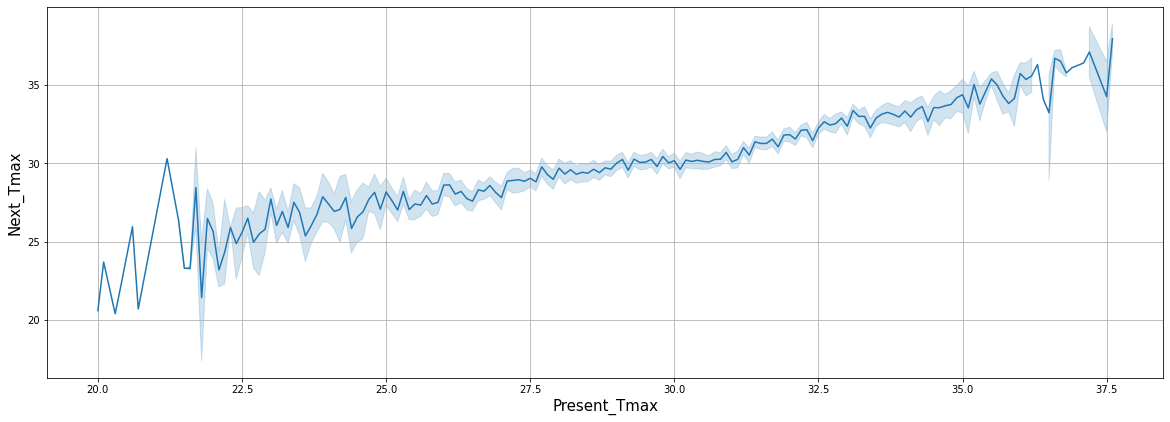

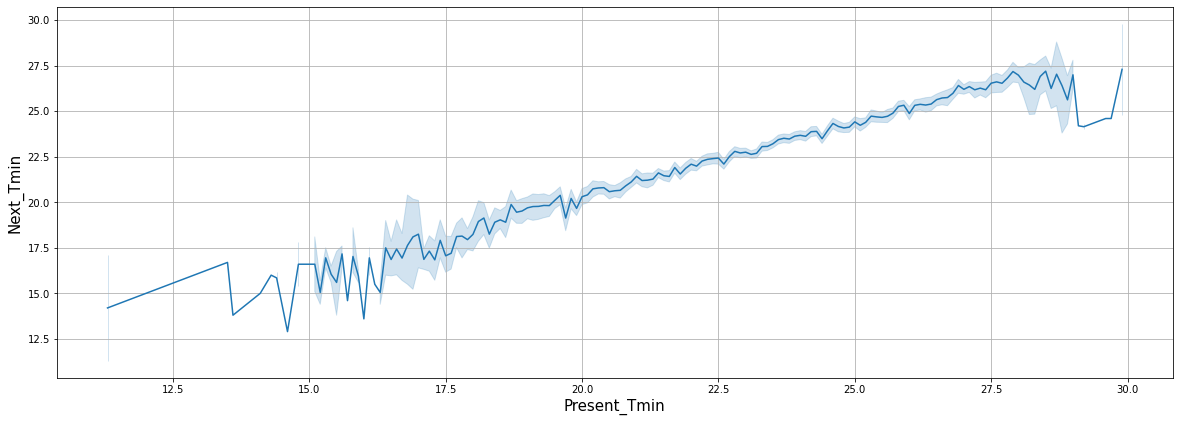

In [61]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='Present_Tmax', y='Next_Tmax', data= temp )
plt.xlabel('Present_Tmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='Present_Tmin', y='Next_Tmin', data= temp)
plt.xlabel('Present_Tmin', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

The Graph showing relationship between Present and Next Tmin and Tmax , we can see a linear relationship between bith the temparture, and it is ture also. The change in the temprature cannot be drastic, it can be can be positve or negative by few points only.

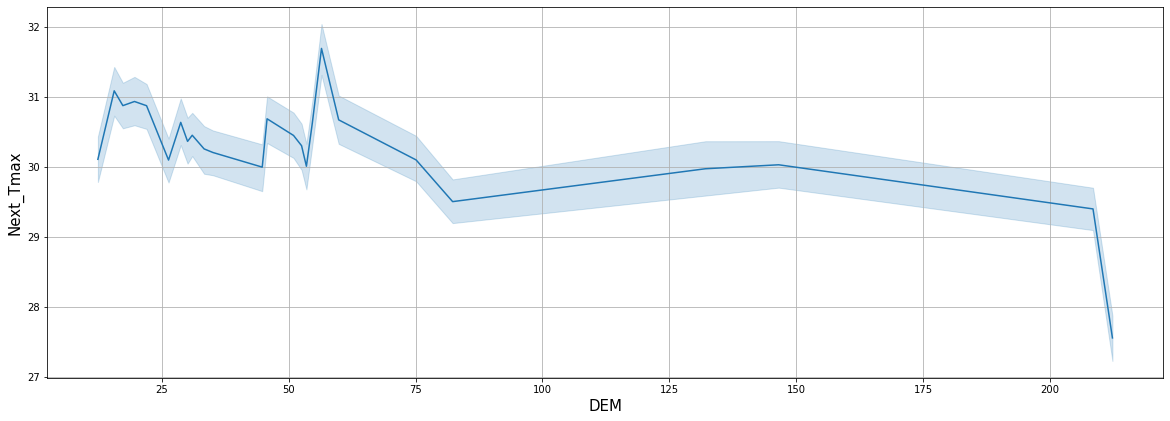

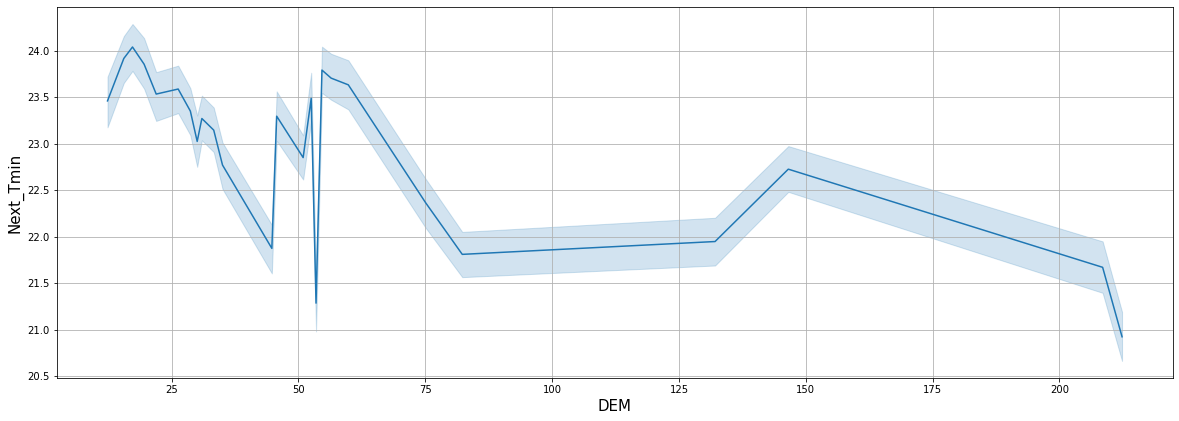

In [62]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='DEM', y='Next_Tmax', data= temp )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='DEM', y='Next_Tmin', data= temp )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

The graph showing the relationship between the Temprature and elevation.
As we can see with increase in the elevation there is decrease in the Next_Tmin and Next_Tmax.

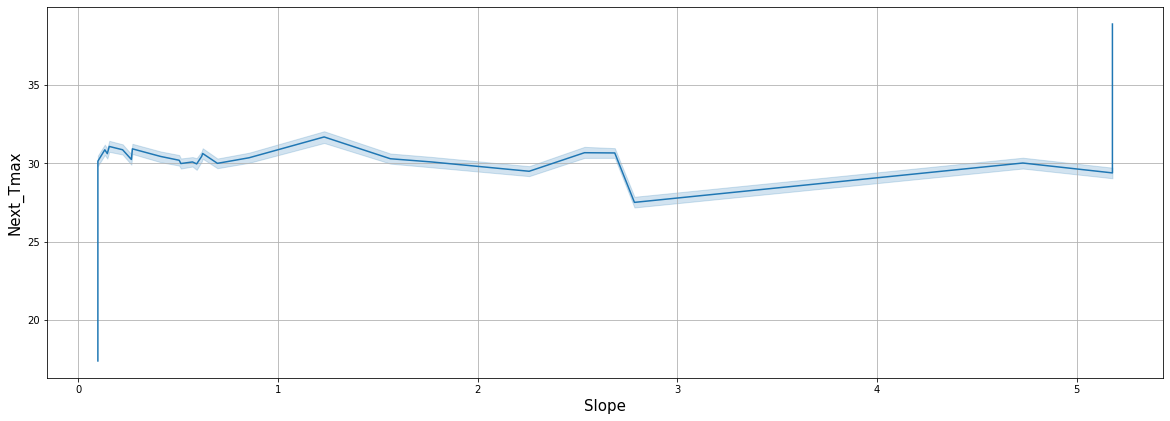

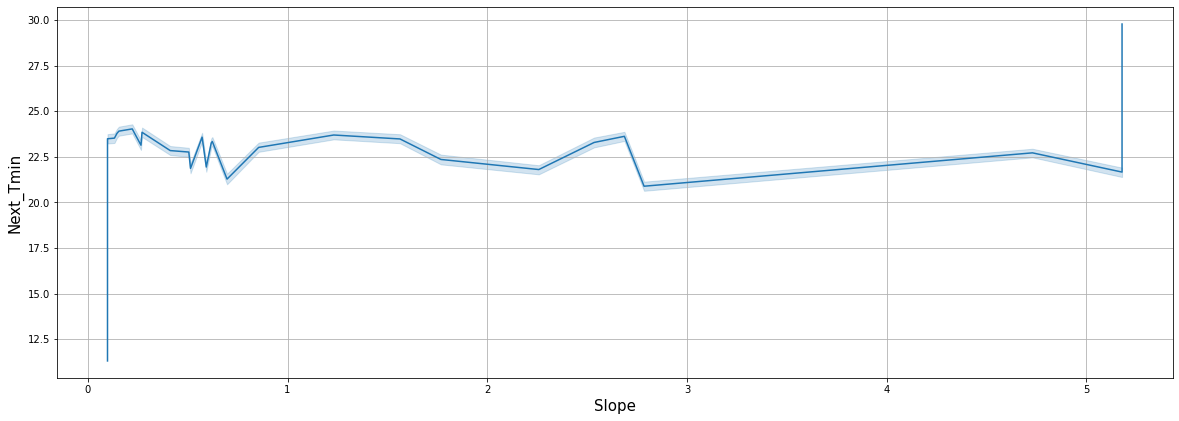

In [63]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='Slope', y='Next_Tmax', data= temp )
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='Slope', y='Next_Tmin', data= temp )
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

Here we can see with increase initially the temprature increases but it is almost constant but after 5 it is increases.
Both the Tempratures showing same relation.

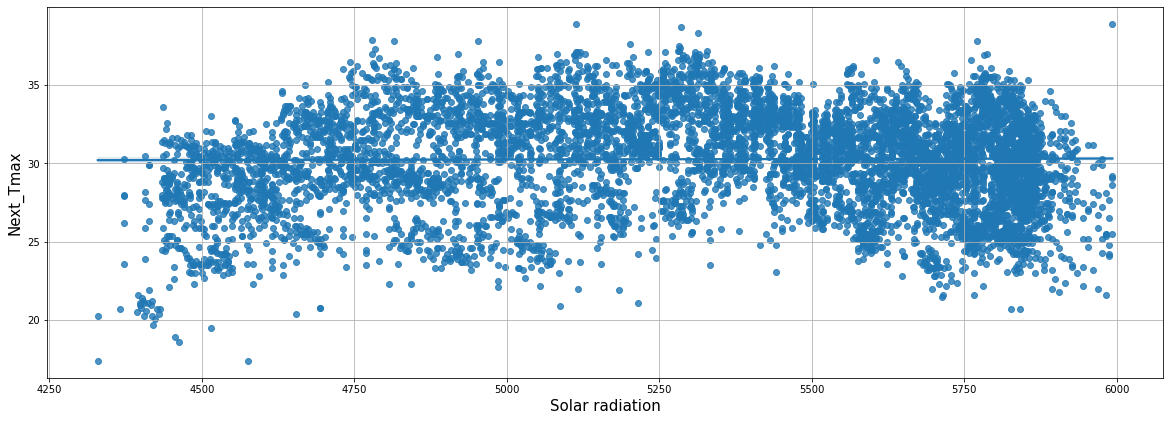

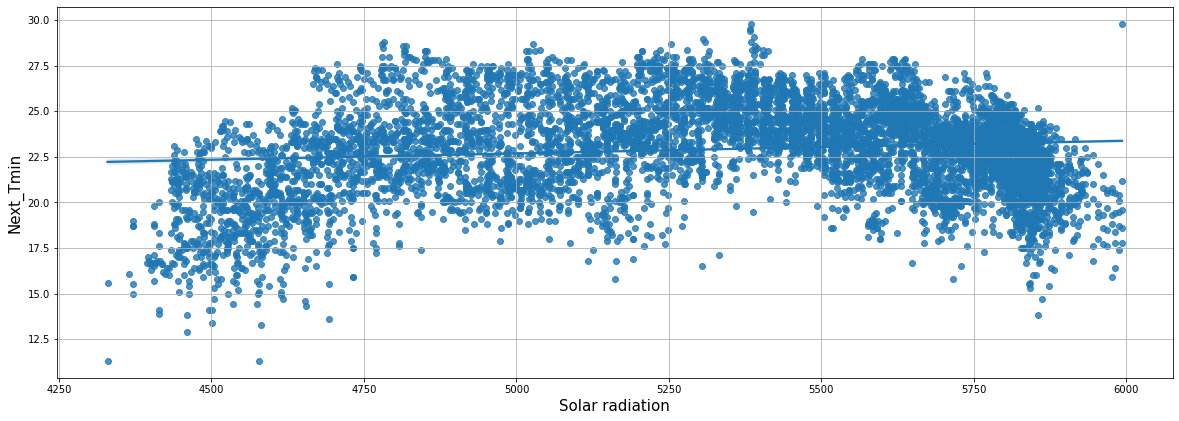

In [64]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='Solar radiation', y='Next_Tmax', data= temp )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='Solar radiation', y='Next_Tmin', data= temp )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

Here we can see relationship between solar radiation and temprature. we can see strong but non linear relation between both the quantity.

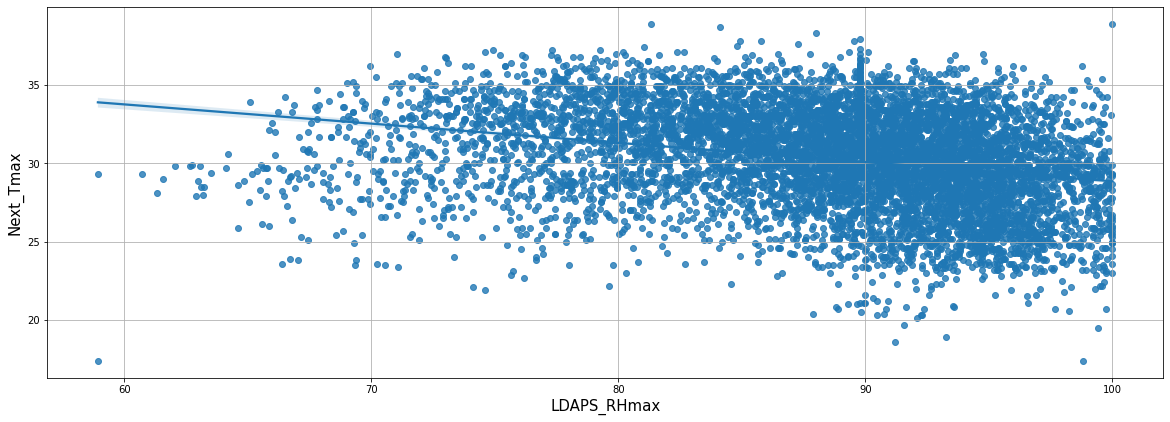

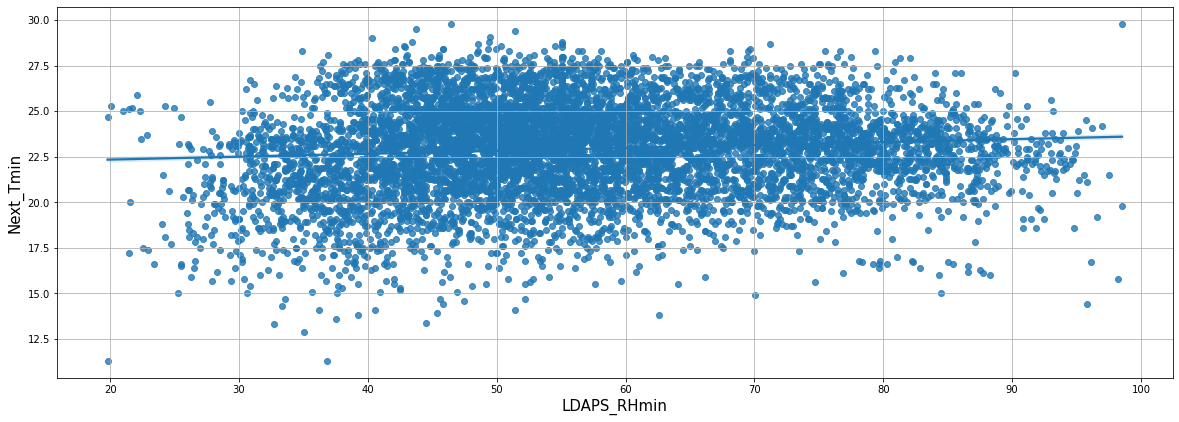

In [65]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_RHmax', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_RHmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_RHmin', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_RHmin', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

Here we can see Moderate negative relationship

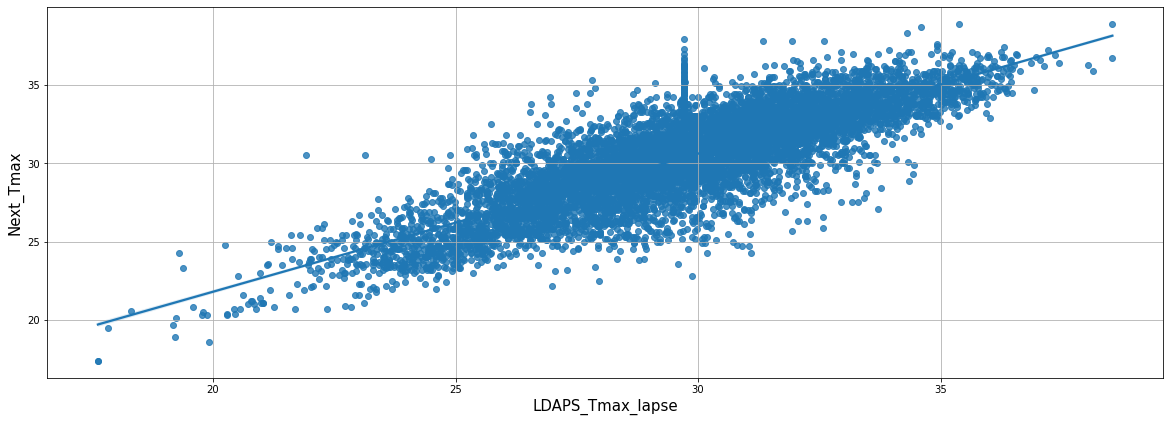

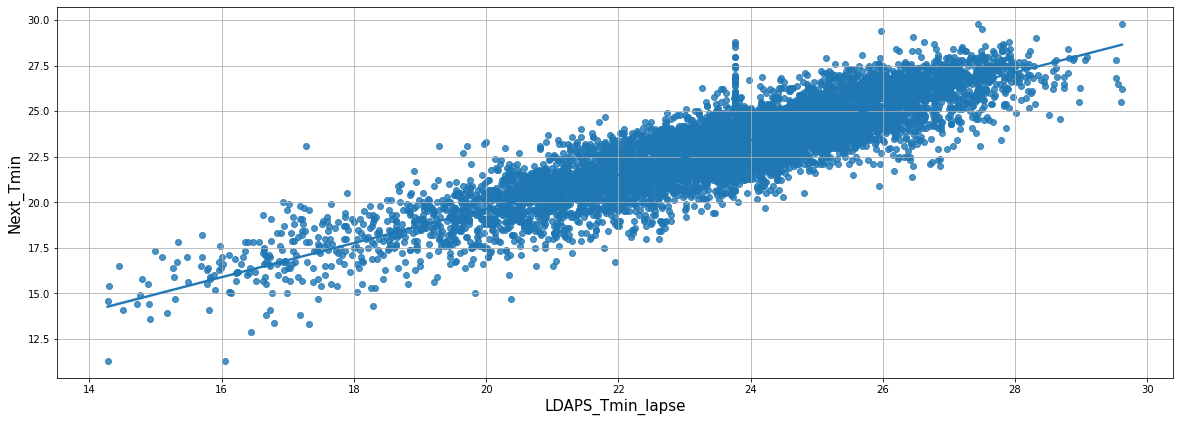

In [66]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_Tmax_lapse', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_Tmax_lapse', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_Tmin_lapse', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

The Graph shows relationship betweem Air_temprature and Next day temprature. We can observe a clearly as strong positive relatoionship.

Text(0, 0.5, 'Next_Tmin')

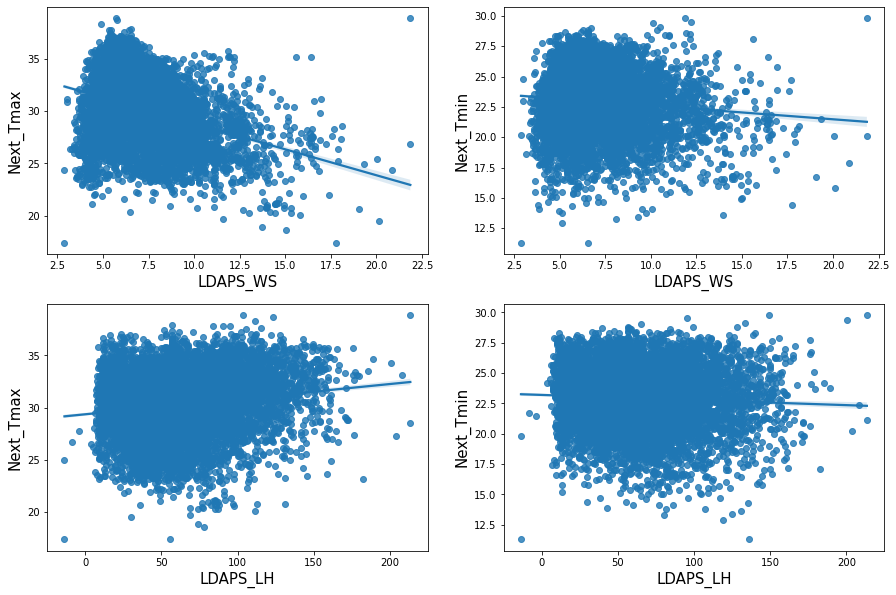

In [67]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_WS', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(2,2,2)
sns.regplot(x='LDAPS_WS', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(2,2,3)
sns.regplot(x='LDAPS_LH', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_LH', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(2,2,4)
sns.regplot(x='LDAPS_LH', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_LH', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)

Here Graph shows the relationship between the latent heat and Next Day temprature.
We can see decrease in the temprature with increase of latent heat , in the forth graph we can see no relation with Latent heat and temprature.

Text(0, 0.5, 'Next_Tmin')

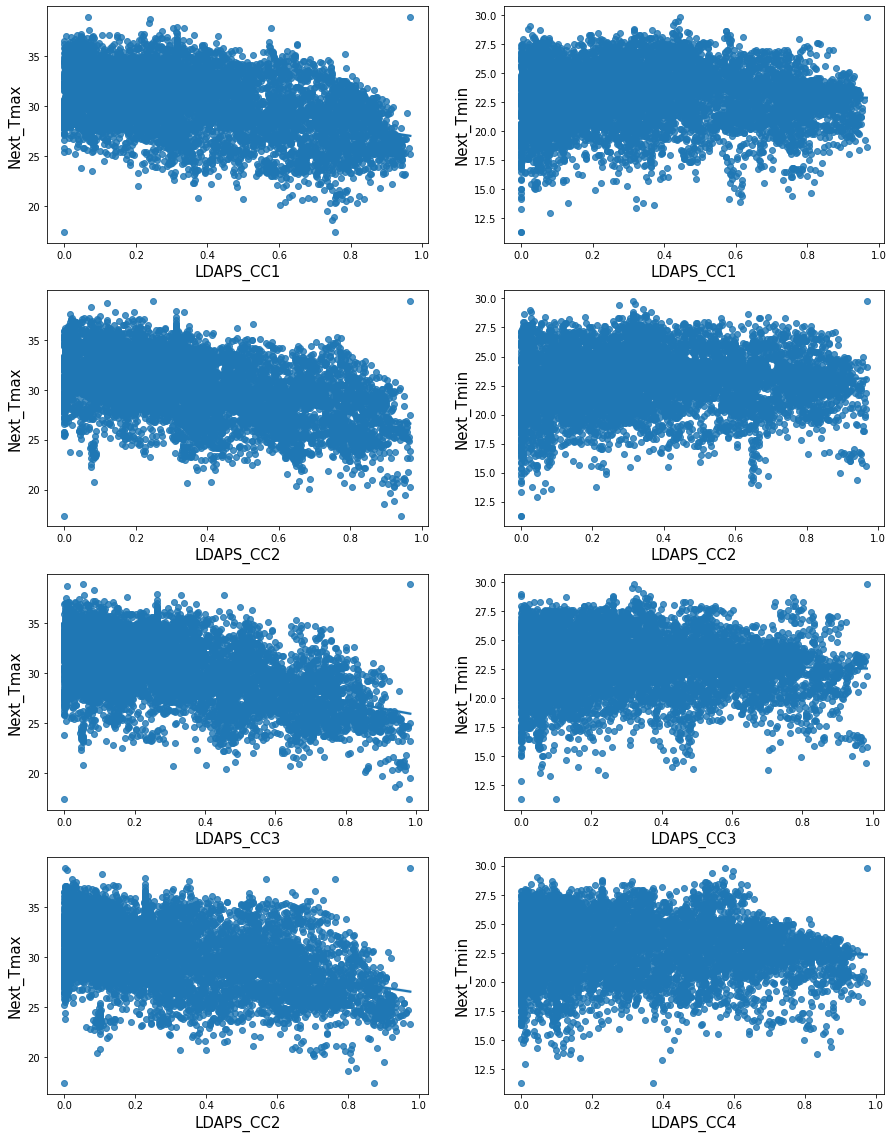

In [68]:

plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_CC1', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_CC1', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_CC1', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_CC1', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_CC2', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_CC2', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_CC3', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_CC3', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,6)
sns.regplot(x='LDAPS_CC3', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_CC3', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_CC4', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_CC4', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_CC4', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)

Here we can see the graphs between split average cloud cover and Next day temprature.
Graphs Showing is not showing very good relationship.
In most of the graphs we can see slightly negative relation.

Text(0, 0.5, 'Next_Tmin')

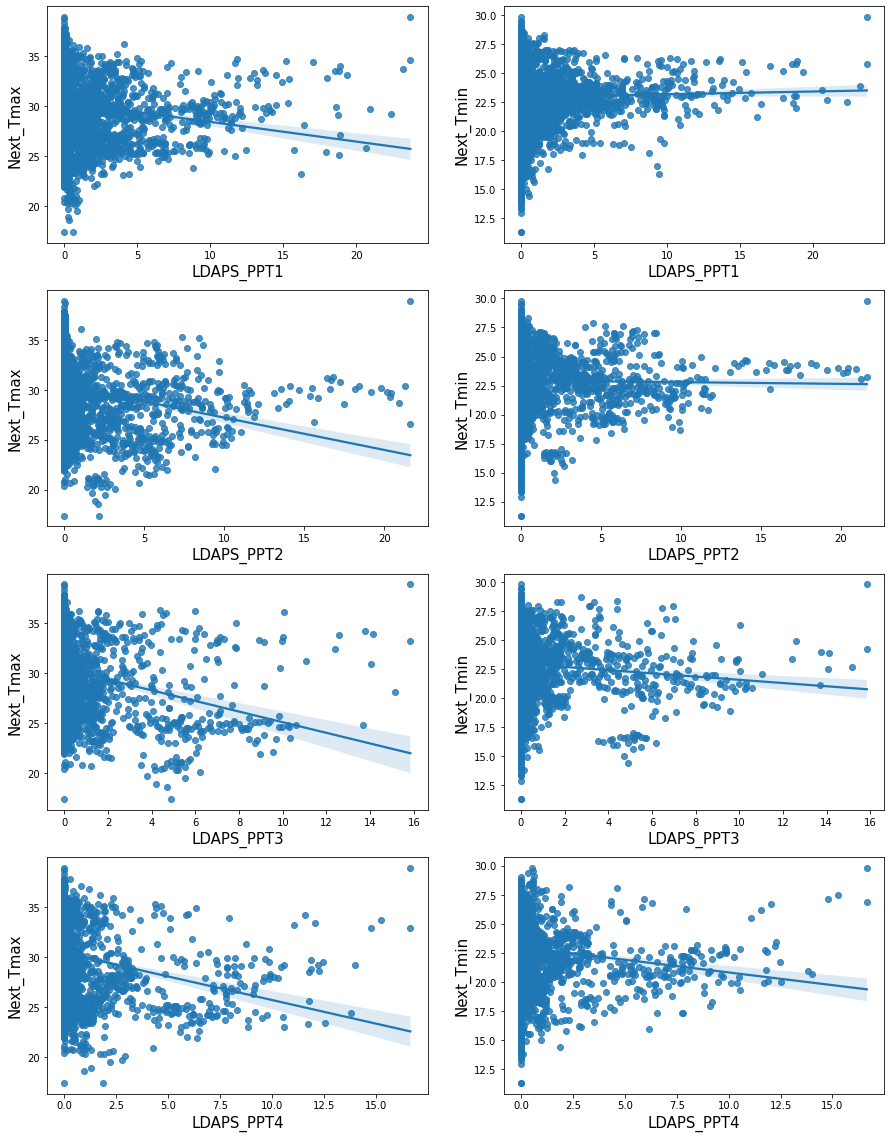

In [69]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_PPT1', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_PPT1', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_PPT2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_PPT2', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_PPT3', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,6)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_PPT3', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmax', data= temp )
plt.xlabel('LDAPS_PPT4', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmin', data= temp )
plt.xlabel('LDAPS_PPT4', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)

Here we can see realtioship between split average precipitation and Temprature , we can clearly see a negative realtionship between both the quantities.

### Data Preprocessing

In this Step we will perform all the preprocessing steps before model buiding like we will drop the irrelivent columns, we scale the data and remove the skewness and ouliers.

Lets First drop the irrilevent columns.

From Data analysis step we can see date, lat and lon are having less or clearly no effect on tagate. Station is numerical counting also not having any effect on temprature, lets drop all the columsn mentioned here.

In [70]:
temp.drop(['station', 'Date', 'lat', 'lon'], axis= 1, inplace= True)

In [71]:
temp.shape

(7752, 21)

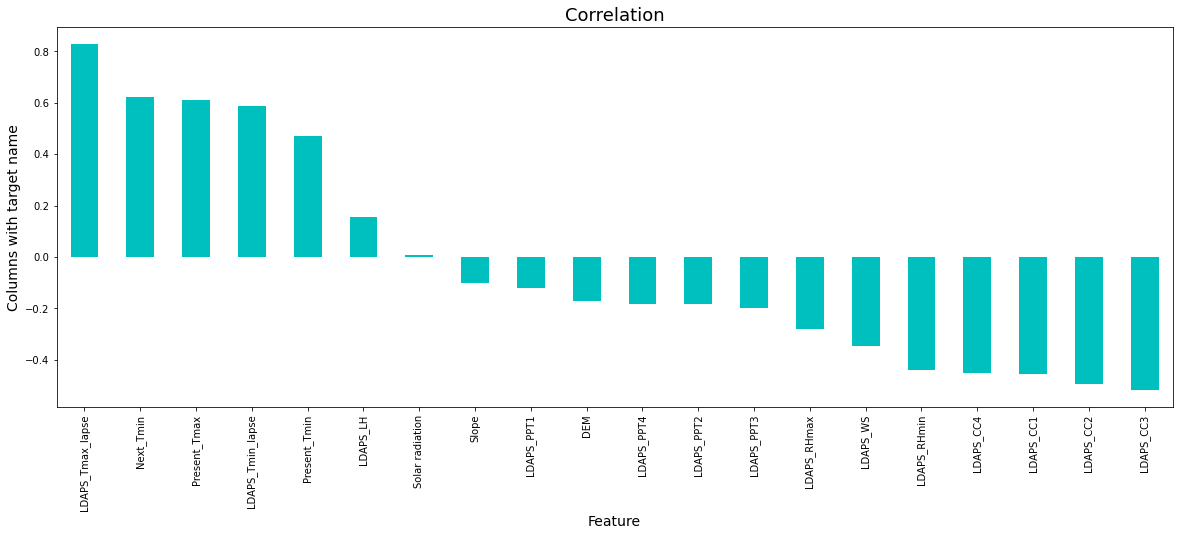

In [72]:
plt.figure(figsize=(20,7))
temp.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see a storng correltion between of LDAPS_Tmax_lapse, Present_Tmax,LDAPS_Tmin_lapse, Present_Tmin, LDAPS_LH and Solar radiation are having positve correlation, other Fetaures having negative correlation.

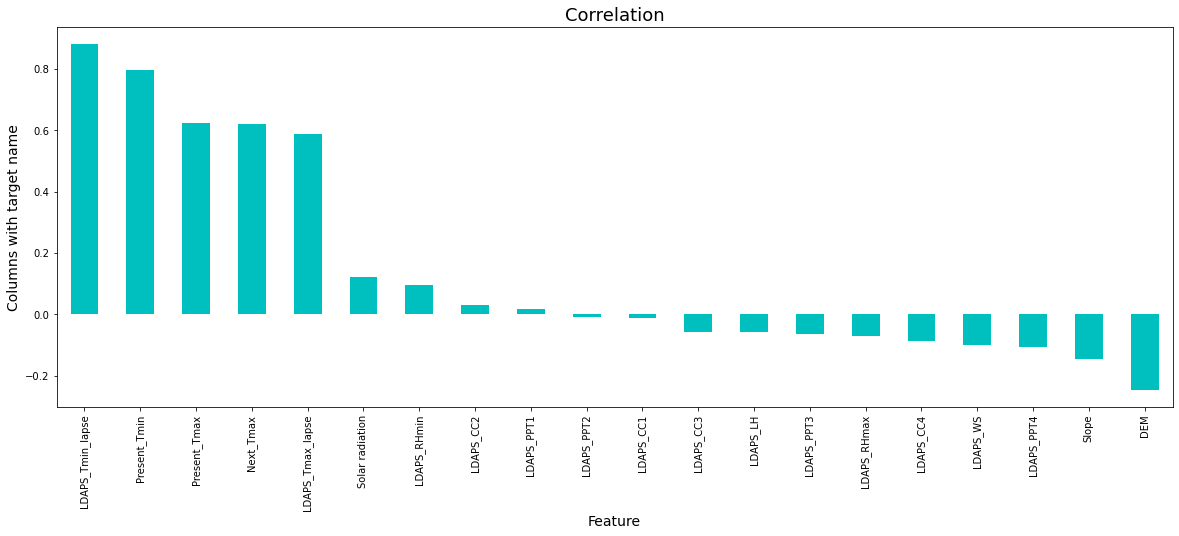

In [73]:
plt.figure(figsize=(20,7))
temp.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see a storng correltion between of LDAPS_Tmin_lapse, Present_Tmin,Present_Tmax, LDAPS_Tmax_lapse, Present_Tmin, LDAPS_LH, LDAPS_CC2, LDAPS_PPT1 , and Solar radiation are having positve correlation, other Fetaures having negative correlation.

# Checking Outliers

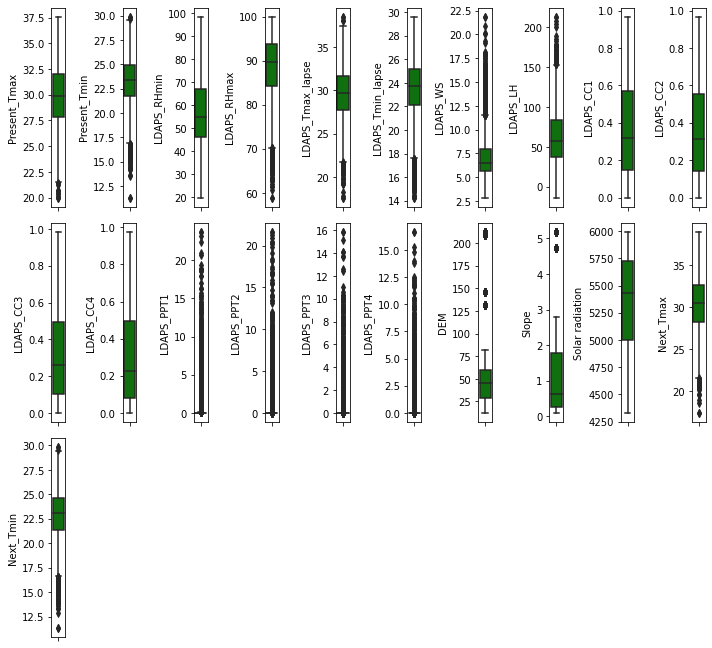

In [74]:
collist=temp.columns.values
ncol= 10
nrows= 10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=temp[collist[i]],color='green', orient='x')
    plt.tight_layout()

Here we can see Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, and LDAPS_CC4 having many outliers, in next step we remove outliers.

# Removing Outliers

In [75]:
from scipy.stats import zscore
z= np.abs(zscore(temp))
z

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.361725      0.760169     0.103649     0.381088          0.525183   
1         0.720675      0.676937     0.306866     0.309610          0.080598   
2         0.619200      0.030530     0.551637     0.616784          0.162639   
3         0.754500      0.072146     0.102559     1.130923          0.030795   
4         0.551550      0.552090     0.038955     0.246800          0.170621   
...            ...           ...          ...          ...               ...   
7747      2.188275      2.549645     2.055314     1.329793          1.112358   
7748      2.188275      2.299950     2.240329     1.549810          0.887955   
7749      2.222100      2.424798     2.316209     1.556967          0.571074   
7750      3.304501      4.963357     2.531209     4.114586          4.088135   
7751      2.648700      2.777168     2.862369     1.622186          3.044250   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0             0.217678  0.125893  0.208564   0.514175   0.590909  ...   
1             0.222809  0.644345  0.313173   0.546482   0.404498  ...   
2             0.450160  0.439018  1.247488   0.608363   0.382312  ...   
3             0.080896  0.663593  0.097609   0.581458   0.504833  ...   
4             0.012213  0.624511  1.355851   0.830157   0.411413  ...   
...                ...       ...       ...        ...        ...  ...   
7747          2.030596  0.434099  0.286208   1.294796   1.069285  ...   
7748          2.048660  0.252892  0.453062   1.272440   1.092930  ...   
7749          2.138873  0.090494  1.589557   1.222369   1.151699  ...   
7750          3.959959  1.936712  2.265567   1.409773   1.384807  ...   
7751          2.615464  6.792373  4.497062   2.293157   2.385618  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       DEM  \
0      0.661828    0.302656    0.273714    0.238242    0.222227  2.772243   
1      0.674470    0.302656    0.273714    0.238242    0.222227  0.315157   
2      0.617605    0.302656    0.273714    0.238242    0.222227  0.526218   
3      0.648714    0.302656    0.273714    0.238242    0.222227  0.297588   
4      0.507430    0.302656    0.273714    0.238242    0.222227  0.494322   
...         ...         ...         ...         ...         ...       ...   
7747   1.178933    0.302656    0.273714    0.238242    0.222227  0.852681   
7748   1.178933    0.302656    0.273714    0.238242    0.222227  0.821213   
7749   1.175789    0.302656    0.273714    0.238242    0.222227  0.779043   
7750   1.178933    0.302656    0.273714    0.238242    0.222227  0.911963   
7751   2.670715   11.933093   12.047815   13.460269   13.650667  2.772243   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     1.115004         1.517935   0.376530   0.697829  
1     0.542158         1.229950   0.071845   0.174298  
2     0.723133         1.216534   0.264006   0.389506  
3     0.932424         1.201176   0.456167   0.550592  
4     0.548433         1.207205   0.296033   0.174298  
...        ...              ...        ...        ...  
7747  0.803915         2.093040   0.632744   1.946251  
7748  0.755095         2.104553   0.536664   1.664349  
7749  0.719338         2.074325   0.792878   2.228152  
7750  0.845455         2.358212   4.123667   4.684723  
7751  2.861435         1.517935   2.762098   2.765534  

[7752 rows x 21 columns]

# Position of Outliers

In [76]:
threshold = 3
print(np.where(z > 3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 6, 13, 13, ..., 13, 14, 15], dtype=int64))


In [77]:
temp_new=temp[(z<3).all(axis=1)]
print(temp.shape)
print(temp_new.shape)

(7752, 21)
(6894, 21)


In [78]:
Loss_percentage=(7752-6894)/7752*100
print(Loss_percentage)

11.06811145510836


Here we can see we have data loss percentage 11.06 which greater that 10 percent, we will contineu with our orignal data.

In [79]:
temp.skew()

Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

We can see data is having skewness in LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, LDAPS_RHmax, LDAPS_WS and LDAPS_LH.

# Removing Skewness

In [80]:
from sklearn.preprocessing import power_transform

In [81]:
X=power_transform(temp, method='yeo-johnson')

In [82]:
X= pd.DataFrame(data=X, columns= ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'])

## Scaling the data Using StandardScaler.

Dividing into Feature and Target data

In [83]:
x=X.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
ymax=temp['Next_Tmax']
ymin= temp['Next_Tmin']

###### Scaling the data using min max scaler

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [85]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [87]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   25.827466
1       Present_Tmin   44.449922
2        LDAPS_RHmin   59.950102
3        LDAPS_RHmax   17.287826
4   LDAPS_Tmax_lapse   59.483051
5   LDAPS_Tmin_lapse   57.120538
6           LDAPS_WS   19.034263
7           LDAPS_LH   59.546094
8          LDAPS_CC1   17.910615
9          LDAPS_CC2   20.309537
10         LDAPS_CC3   17.526463
11         LDAPS_CC4    9.723241
12        LDAPS_PPT1    2.941523
13        LDAPS_PPT2    2.663910
14        LDAPS_PPT3    2.205350
15        LDAPS_PPT4    2.132337
16               DEM   13.267132
17             Slope    8.516408
18   Solar radiation    5.545723

We can see few columns having higher VIF we will drop one by one and check at every step.

In [88]:
x.drop(['LDAPS_RHmin'],axis=1, inplace= True)

In [89]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   25.047381
1       Present_Tmin   44.053799
2        LDAPS_RHmax   13.966267
3   LDAPS_Tmax_lapse   43.308967
4   LDAPS_Tmin_lapse   42.267337
5           LDAPS_WS   18.663838
6           LDAPS_LH   48.401234
7          LDAPS_CC1   17.786326
8          LDAPS_CC2   19.778993
9          LDAPS_CC3   15.991539
10         LDAPS_CC4    9.690095
11        LDAPS_PPT1    2.941486
12        LDAPS_PPT2    2.663137
13        LDAPS_PPT3    2.198450
14        LDAPS_PPT4    2.127218
15               DEM   13.250938
16             Slope    8.494823
17   Solar radiation    5.292753

In [90]:
x.drop(['LDAPS_LH'],axis=1, inplace= True)

In [91]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   22.009314
1       Present_Tmin   43.638648
2        LDAPS_RHmax    9.896363
3   LDAPS_Tmax_lapse   33.384581
4   LDAPS_Tmin_lapse   35.498577
5           LDAPS_WS   16.226480
6          LDAPS_CC1   17.338326
7          LDAPS_CC2   19.709221
8          LDAPS_CC3   15.926216
9          LDAPS_CC4    9.618795
10        LDAPS_PPT1    2.872805
11        LDAPS_PPT2    2.647179
12        LDAPS_PPT3    2.197161
13        LDAPS_PPT4    2.115690
14               DEM   13.123303
15             Slope    8.435583
16   Solar radiation    5.283695

In [92]:
x.drop(['Present_Tmin'],axis=1, inplace= True)

In [93]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   18.243249
1        LDAPS_RHmax    9.224051
2   LDAPS_Tmax_lapse   32.729169
3   LDAPS_Tmin_lapse   29.255799
4           LDAPS_WS   15.671996
5          LDAPS_CC1   17.087160
6          LDAPS_CC2   19.705087
7          LDAPS_CC3   15.924862
8          LDAPS_CC4    9.575833
9         LDAPS_PPT1    2.871436
10        LDAPS_PPT2    2.646866
11        LDAPS_PPT3    2.195655
12        LDAPS_PPT4    2.087196
13               DEM   12.770108
14             Slope    8.402964
15   Solar radiation    5.170875

In [94]:
x.drop(['LDAPS_Tmax_lapse'],axis=1, inplace= True)

In [95]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   16.387528
1        LDAPS_RHmax    9.032540
2   LDAPS_Tmin_lapse   18.300666
3           LDAPS_WS   14.758883
4          LDAPS_CC1   16.947070
5          LDAPS_CC2   18.696732
6          LDAPS_CC3   15.527766
7          LDAPS_CC4    9.523547
8         LDAPS_PPT1    2.847818
9         LDAPS_PPT2    2.583490
10        LDAPS_PPT3    2.195131
11        LDAPS_PPT4    2.086576
12               DEM   12.463192
13             Slope    8.380505
14   Solar radiation    5.001748

In [96]:
x.drop(['LDAPS_CC2'],axis=1, inplace= True)

In [97]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   16.367212
1        LDAPS_RHmax    8.905184
2   LDAPS_Tmin_lapse   18.199125
3           LDAPS_WS   14.756111
4          LDAPS_CC1   11.315758
5          LDAPS_CC3   12.959446
6          LDAPS_CC4    9.523513
7         LDAPS_PPT1    2.724140
8         LDAPS_PPT2    2.214950
9         LDAPS_PPT3    2.194886
10        LDAPS_PPT4    2.058092
11               DEM   12.459962
12             Slope    8.378153
13   Solar radiation    4.993929

In [98]:
x.drop(['LDAPS_Tmin_lapse'],axis=1, inplace= True)

In [99]:
calc_vif(x)

variables  VIF FACTOR
0      Present_Tmax    6.525007
1       LDAPS_RHmax    8.885355
2          LDAPS_WS   14.694059
3         LDAPS_CC1   10.144945
4         LDAPS_CC3   12.951297
5         LDAPS_CC4    9.517273
6        LDAPS_PPT1    2.661220
7        LDAPS_PPT2    2.212382
8        LDAPS_PPT3    2.194857
9        LDAPS_PPT4    2.013666
10              DEM   12.459748
11            Slope    8.337138
12  Solar radiation    4.953635

In [100]:
x.drop(['LDAPS_WS'],axis=1, inplace= True)

In [101]:
calc_vif(x)

variables  VIF FACTOR
0      Present_Tmax    4.760964
1       LDAPS_RHmax    8.506020
2         LDAPS_CC1    9.570874
3         LDAPS_CC3   12.904517
4         LDAPS_CC4    9.423493
5        LDAPS_PPT1    2.654948
6        LDAPS_PPT2    2.211501
7        LDAPS_PPT3    2.194650
8        LDAPS_PPT4    1.989337
9               DEM   11.880327
10            Slope    8.335969
11  Solar radiation    4.716739

In [102]:
x.drop(['LDAPS_CC3'],axis=1, inplace= True)

In [103]:
calc_vif(x)

variables  VIF FACTOR
0      Present_Tmax    4.709926
1       LDAPS_RHmax    8.501329
2         LDAPS_CC1    8.362328
3         LDAPS_CC4    4.806686
4        LDAPS_PPT1    2.580740
5        LDAPS_PPT2    2.190570
6        LDAPS_PPT3    1.970139
7        LDAPS_PPT4    1.976206
8               DEM   11.876357
9             Slope    8.335862
10  Solar radiation    4.716691

we can contine with this data we almost removed colliear data.

# Model Building

In [104]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Chosing Best Random State

In [105]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,ymin,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", r2_score(y_test,pred_test)*100)

At Random state  24 The Model performing Well
At Random State 24
Training Accuracy score is- 49.9806309896102
Testing Accuracy Score is- 49.95838870690673
At Random state  69 The Model performing Well
At Random State 69
Training Accuracy score is- 49.98006656112671
Testing Accuracy Score is- 49.96883542681376
At Random state  123 The Model performing Well
At Random State 123
Training Accuracy score is- 49.98798771287265
Testing Accuracy Score is- 49.95420694916023
At Random state  221 The Model performing Well
At Random State 221
Training Accuracy score is- 49.97960570739527
Testing Accuracy Score is- 49.96315226310065
At Random state  271 The Model performing Well
At Random State 271
Training Accuracy score is- 49.96639765298322
Testing Accuracy Score is- 49.96953600488359
At Random state  457 The Model performing Well
At Random State 457
Training Accuracy score is- 49.98400436023959
Testing Accuracy Score is- 49.956277829211956
At Random state  512 The Model performing Well
At Random

In [106]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,ymin,random_state=730,test_size=0.20)
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(r2_score(y_test_b,lr_pred))

0.49980882518549574


# Cross Validation of Model

In [107]:
test_accuracy= r2_score(y_test_b,lr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,ymin,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 32.2000352824476 and Accuracy score is 49.98088251854958
At cross fold 3 the Cross Val score is 28.59894659615354 and Accuracy score is 49.98088251854958
At cross fold 4 the Cross Val score is 34.361348994390795 and Accuracy score is 49.98088251854958
At cross fold 5 the Cross Val score is 31.224040068745673 and Accuracy score is 49.98088251854958
At cross fold 6 the Cross Val score is 25.084928064439342 and Accuracy score is 49.98088251854958
At cross fold 7 the Cross Val score is 28.47328836076699 and Accuracy score is 49.98088251854958
At cross fold 8 the Cross Val score is 28.83520902957707 and Accuracy score is 49.98088251854958
At cross fold 9 the Cross Val score is 5.232564039116343 and Accuracy score is 49.98088251854958


At cross fold 4 the Cross Val score is 34.361348994390816 and Accuracy score is 49.68377098184198
Diffrence in both is very high lets try Another models.

In [108]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,lr_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,lr_pred)))

Error:
Mean Absolute Error: 1.3874195047445155
Mean Squared Error: 3.095911072015181
Root Mean Square Error: 1.7595201254930792


## Lasso

In [109]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymin,cv=4,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: -0.07227224685255607
Cross val Score : -13.067561296868346


In [110]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 1.9571028715548988
Mean Squared Error: 6.1939288666107135
Root Mean Square Error: 2.4887605080864477


## Ridge

In [111]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,ymin,cv=4, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  49.972987400418134
Cross val Score 34.35267406716226


In [112]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 1.387466649282627
Mean Squared Error: 3.096399736847124
Root Mean Square Error: 1.7596589831121041


Cross val Score 34.35267406716226
Diffrence in both the score is high, we can check for other model.

## Decision TreeRegressor

In [113]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,ymin,cv=4,scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 62.022514385204694
Cross Val Score: 1.283207734562422


In [114]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 1.059316569954868
Mean Squared Error: 2.3505996131528044
Root Mean Square Error: 1.5331665314481673


## KNeighborsRegressor

In [115]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,ymin, cv=4, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 74.0261198832138
Cross val Score : 12.105820977006374


In [116]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 0.9577176015473888
Mean Squared Error: 1.6076417794970985
Root Mean Square Error: 1.2679281444534223


# Ensemble Techniques

In [117]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,ymin, cv=4, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 83.32521806391068
Cross val Score : 36.017809050581604


In [118]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.741598968407479
Mean Squared Error: 1.0320782256608636
Root Mean Square Error: 1.0159125088613012


## GradientBoostingRegressor

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymin, cv=4, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 83.32521806391068
Cross val Score : 43.88909438928935


In [120]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 0.741598968407479
Mean Squared Error: 1.0320782256608636
Root Mean Square Error: 1.0159125088613012


###### Lets Try Hyper Parameter Tuning

We will try Hyper para mere Tuning on Ridge,GradientBoostingRegressor

In [121]:
# Hyperparameter tunnign wih Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10)), 'max_iter': [500,1000,1500,2000, 2500], 'selection':['cyclic',' random']}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 0.0001, 'max_iter': 500, 'random_state': 0, 'selection': 'cyclic'}


In [122]:
ls=Lasso(alpha=0.001,max_iter=500, random_state=0, selection='cyclic')
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymin,cv=4, scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 49.93886036655463
Cross val Score : 34.41188427734935


In [123]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [124]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymin, cv=4, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 83.32521806391068
Cross val Score : 44.3821985983322


# Lets Apply model for Tmax

In [125]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,ymax,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", r2_score(y_test,pred_test)*100)

At Random state  55 The Model performing Well
At Random State 55
Training Accuracy score is- 55.334062476371095
Testing Accuracy Score is- 55.32201939804171
At Random state  71 The Model performing Well
At Random State 71
Training Accuracy score is- 55.32004151967762
Testing Accuracy Score is- 55.29814430956901
At Random state  87 The Model performing Well
At Random State 87
Training Accuracy score is- 55.34546267203516
Testing Accuracy Score is- 55.324081215221675
At Random state  121 The Model performing Well
At Random State 121
Training Accuracy score is- 55.32615997222086
Testing Accuracy Score is- 55.324944189525695
At Random state  146 The Model performing Well
At Random State 146
Training Accuracy score is- 55.327825512302844
Testing Accuracy Score is- 55.32307111783774
At Random state  164 The Model performing Well
At Random State 164
Training Accuracy score is- 55.31233933763387
Testing Accuracy Score is- 55.340157601047494
At Random state  199 The Model performing Well
At Ran

In [126]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,ymax,random_state=948,test_size=0.20)

In [127]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(r2_score(y_test_b,lr_pred))

0.5533706254663345


## Cross Validation of Model

In [128]:
test_accuracy= r2_score(y_test_b,lr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,ymax,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 39.30344097014057 and Accuracy score is 55.337062546633454
At cross fold 3 the Cross Val score is 46.80145675960841 and Accuracy score is 55.337062546633454
At cross fold 4 the Cross Val score is 45.60849858133548 and Accuracy score is 55.337062546633454
At cross fold 5 the Cross Val score is 45.787248941727654 and Accuracy score is 55.337062546633454
At cross fold 6 the Cross Val score is 44.825705064435375 and Accuracy score is 55.337062546633454
At cross fold 7 the Cross Val score is 44.264787819377204 and Accuracy score is 55.337062546633454
At cross fold 8 the Cross Val score is 42.36238848824787 and Accuracy score is 55.337062546633454
At cross fold 9 the Cross Val score is 30.50237174519476 and Accuracy score is 55.337062546633454


In [129]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,lr_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,lr_pred)))

Error:
Mean Absolute Error: 1.6293918573291502
Mean Squared Error: 4.385625332409362
Root Mean Square Error: 2.0941884663060684


## Lasso


In [130]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymax,cv=3,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: -0.030113307369461495
Cross val Score : -5.1904906422113095


In [131]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 2.567981766215407
Mean Squared Error: 9.822340937217307
Root Mean Square Error: 3.134061412483378


## Ridge

In [132]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,ymax,cv=3, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  55.35609617259693
Cross val Score 46.799855386314746


In [134]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 1.6291665786308827
Mean Squared Error: 4.383756347587659
Root Mean Square Error: 2.0937421874690445


# Decision TreeRegressor

In [135]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,ymax,cv=3,scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 70.91582806003309
Cross Val Score: 8.040509080602298


In [136]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))


Error:
Mean Absolute Error: 1.1369439071566732
Mean Squared Error: 2.855886524822696
Root Mean Square Error: 1.689936840483305


# KNeighborsRegressor

In [137]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,ymin, cv=4, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 74.0641843540368
Cross val Score : 12.105820977006374


In [138]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 1.2155254674403613
Mean Squared Error: 2.546737330754352
Root Mean Square Error: 1.5958500339174582


R2 Score: 0 74.0641843540368 Cross val Score : 24.923357359212424
Both score having huge diffrence, Model performnace is less.

## Ensemble Techniques

In [139]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,ymax, cv=3, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 86.87222849684055
Cross val Score : 43.55180319816421


In [140]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.8225699548678272
Mean Squared Error: 1.289066294003869
Root Mean Square Error: 1.135370553609644


R2 score: 86.66200007467259 Cross val Score : 42.64002471666921 Very big diffrence in both the score . Ridge and linear model are still best.

## GradientBoostingRegressor

In [141]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymax, cv=3, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 86.87222849684055
Cross val Score : 48.92937717314677


In [142]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 0.8225699548678272
Mean Squared Error: 1.289066294003869
Root Mean Square Error: 1.135370553609644


R2 score: 86.66200007467259
Cross val Score : 48.71517655713888 Diffrence is still high, Ridge and linear are still best.

## Lets Try Hyper Parameter Tuning

We will try Hyper Parameter Tuning on Ridge and GradientBoostingRegressor
lets see the performnace.

In [144]:
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'fit_intercept': [True,False], 'normalize':[True, False], 'copy_X': [True , False], 'tol':[0.0001,0.001,0.01,0.1,1,10]}
rd=Ridge()
rdclf=GridSearchCV(rd, parameters)
rdclf.fit(x_train_b, y_train_b)
print(rdclf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'tol': 0.0001}


In [149]:
rd= Ridge(alpha= 0.001, copy_X= True, fit_intercept= True, normalize= True, tol= 0.0001)
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,ymax,cv=3)
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  55.34019449428218
Cross val Score 46.80896590328253


We can see Both the score are almost same as earlier. Linear Model still working good.

In [150]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [151]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymax, cv=3, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 86.87222849684055
Cross val Score : 47.89947489015165


###### Here we can see our linear model is performing well for Tmax. Lest save the model

## Model for Tmin

In [152]:
import pickle
filename='Temperature Forecast Project using ML_lsmin.pkl'
pickle.dump(ls,open(filename,'wb'))

In [153]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(ls.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0         32.8  30.286551
1         32.6  30.286551
2         30.5  30.286551
3         31.6  30.286551
4         29.7  30.286551
...        ...        ...
1546      28.6  30.286551
1547      25.4  30.286551
1548      27.6  30.286551
1549      32.3  30.286551
1550      29.2  30.286551

[1551 rows x 2 columns]

## Model for TMax

In [154]:
import pickle
filename='Temperature Forecast Project using ML_lrMax.pkl'
pickle.dump(lr,open(filename,'wb'))

In [155]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(lr.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0         32.8  30.173872
1         32.6  33.275172
2         30.5  30.239947
3         31.6  32.830702
4         29.7  31.648675
...        ...        ...
1546      28.6  34.231935
1547      25.4  28.893476
1548      27.6  29.087668
1549      32.3  31.041835
1550      29.2  28.837300

[1551 rows x 2 columns]

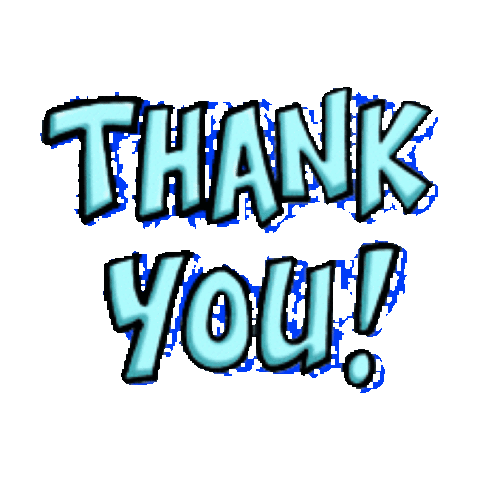